In [1]:
import scipy.sparse as spr
import sys
path2oti = '../../../build/'
sys.path.append(path2oti) # Add path to OTI library.

import pyoti.real   as r
import pyoti.sparse as oti 
import pyoti.core   as coti
import pyoti.fem    as fem 

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

e  = oti.e
np = oti.np

# Triangle element

In [2]:
# Integration order:
intorder = 3
# Number of dimensions of the analysis
ndim_an = 2


x = r.array([[ 5],
             [10],
             [10]
              ])

y = r.array([[ 5],
             [ 1],
             [ 8]
              ])

z = r.array([[ 0],
             [ 0],
             [ 0]
              ])

els = np.array([0,1,2])

fem.dtri3.end()
fem.dtri3.allocate(intorder)
fem.dtri3.allocate_spatial(ndim_an,compute_Jinv = True)
fem.dtri3.set_coordinates(x,y,z,els)
fem.dtri3.compute_jacobian()

In [3]:
%timeit fem.dtri3.compute_jacobian()

5 µs ± 65.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
fem.dtri3.Nzeta

dmatfe< nip: 4, 
(Integration point - 0) 
-------------------------
[[0. 0. 0.]]
-------------------------
(Integration point - 1) 
-------------------------
[[0. 0. 0.]]
-------------------------
(Integration point - 2) 
-------------------------
[[0. 0. 0.]]
-------------------------
(Integration point - 3) 
-------------------------
[[0. 0. 0.]]
-------------------------
>

In [5]:
out = fem.dtri3.N.copy()
%timeit fem.dtri3.N+fem.dtri3.N
%timeit fem.r.sum(fem.dtri3.N,fem.dtri3.N)
%timeit fem.r.sum(fem.dtri3.N,fem.dtri3.N, out=out)


983 ns ± 9.89 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.16 µs ± 14.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
425 ns ± 1.61 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [7]:
N = fem.tri3.N

In [5]:
fem.tri3.N.shape

(1, 3)

In [8]:
oti.dot(fem.tri3.Ny,oti.ones((3,1)))

matsofe< nip: 4, 
(Integration point - 0) 
-------------------------
matso< shape: (1, 1), 
 - Column 0
(0,0) 0 + 0 * e([1]) + 0 * e([2]) + 0 * e([3]) + 0 * e([4]) + 0 * e([5]) + 0 * e([6])
>
-------------------------
(Integration point - 1) 
-------------------------
matso< shape: (1, 1), 
 - Column 0
(0,0) 0 + 0 * e([1]) + 0 * e([2]) + 0 * e([3]) + 0 * e([4]) + 0 * e([5]) + 0 * e([6])
>
-------------------------
(Integration point - 2) 
-------------------------
matso< shape: (1, 1), 
 - Column 0
(0,0) 0 + 0 * e([1]) + 0 * e([2]) + 0 * e([3]) + 0 * e([4]) + 0 * e([5]) + 0 * e([6])
>
-------------------------
(Integration point - 3) 
-------------------------
matso< shape: (1, 1), 
 - Column 0
(0,0) 0 + 0 * e([1]) + 0 * e([2]) + 0 * e([3]) + 0 * e([4]) + 0 * e([5]) + 0 * e([6])
>
-------------------------
>

In [18]:
res = fem.tri3.N.copy()
three = oti.number(3)

In [7]:
res = oti.zero(nip = fem.tri3.N.nip)
%timeit fem.tri3.N.get_item_ij(0,1)

342 ns ± 4.02 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [11]:
# oti.sub(fem.tri3.N,fem.tri3.N,out=res)
res

matsofe< nip: 4, 
(Integration point - 0) 
-------------------------
matso< shape: (1, 3), 
 - Column 0
(0,0) 1
 - Column 1
(0,1) 1
 - Column 2
(0,2) 1
>
-------------------------
(Integration point - 1) 
-------------------------
matso< shape: (1, 3), 
 - Column 0
(0,0) 1
 - Column 1
(0,1) 1
 - Column 2
(0,2) 1
>
-------------------------
(Integration point - 2) 
-------------------------
matso< shape: (1, 3), 
 - Column 0
(0,0) 1
 - Column 1
(0,1) 1
 - Column 2
(0,2) 1
>
-------------------------
(Integration point - 3) 
-------------------------
matso< shape: (1, 3), 
 - Column 0
(0,0) 1
 - Column 1
(0,1) 1
 - Column 2
(0,2) 1
>
-------------------------
>

In [11]:
res-fem.tri3.N-fem.tri3.N

matsofe< nip: 4, 
(Integration point - 0) 
-------------------------
matso< shape: (1, 3), 
 - Column 0
(0,0) 0
 - Column 1
(0,1) 0
 - Column 2
(0,2) 0
>
-------------------------
(Integration point - 1) 
-------------------------
matso< shape: (1, 3), 
 - Column 0
(0,0) 0
 - Column 1
(0,1) 0
 - Column 2
(0,2) 0
>
-------------------------
(Integration point - 2) 
-------------------------
matso< shape: (1, 3), 
 - Column 0
(0,0) 0
 - Column 1
(0,1) 0
 - Column 2
(0,2) 0
>
-------------------------
(Integration point - 3) 
-------------------------
matso< shape: (1, 3), 
 - Column 0
(0,0) 0
 - Column 1
(0,1) 0
 - Column 2
(0,2) 0
>
-------------------------
>

In [8]:
%timeit fem.tri3.compute_jacobian()
# old before optimizations
# 63 µs ± 2.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
# after jacobian optimizations
# 51.5 µs ± 247 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
# after jacobian inverse optimizations
# 34.2 µs ± 296 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

36.6 µs ± 4.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%timeit fem.tri3.compute_jacobian_bruteforce()

77.9 µs ± 2.31 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
val = oti.gauss_integrate(1,fem.tri3.w_dJ)
# %timeit val.__class__==oti.sotinum
# tval = type(val)
# %timeit type(val)
# %timeit tval == oti.sotinum
val

17.5000 - 3.5000 * e([1]) + 1.5000 * e([2]) + 2.0000 * e([3]) + 0.0000 * e([4]) - 2.5000 * e([5]) + 2.5000 * e([6])

In [8]:
oti.dot_product(fem.tri3.N,fem.tri3.N)

sotife< nip: 4, 
(0) 0.333333
(1) 0.44
(2) 0.44
(3) 0.44
>

In [30]:
%timeit val = oti.gauss_integrate(oti.one(nip=fem.tri3.nip),fem.tri3.w_dJ)
xx = oti.one(nip=fem.tri3.nip)
%timeit val = oti.gauss_integrate(xx,fem.tri3.w_dJ)
xx = oti.number(1)
%timeit val = oti.gauss_integrate(xx,fem.tri3.w_dJ)
%timeit val = oti.gauss_integrate(1,fem.tri3.w_dJ)

1.62 µs ± 26.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
850 ns ± 20.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
672 ns ± 2.19 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
616 ns ± 1.28 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [24]:
val.taylor_integrate(bases=[1,2,3,4,5,6],deltas=[-10,0,0,0,-10,0])

77.5000

In [10]:
fem.tri3.w_dJ

sotife< nip: 4, 
(0) -9.84375 + 1.96875 * e([1]) - 0.84375 * e([2]) - 1.125 * e([3]) - 0 * e([4]) + 1.40625 * e([5]) - 1.40625 * e([6])
(1) 9.11458 - 1.82292 * e([1]) + 0.78125 * e([2]) + 1.04167 * e([3]) + 0 * e([4]) - 1.30208 * e([5]) + 1.30208 * e([6])
(2) 9.11458 - 1.82292 * e([1]) + 0.78125 * e([2]) + 1.04167 * e([3]) + 0 * e([4]) - 1.30208 * e([5]) + 1.30208 * e([6])
(3) 9.11458 - 1.82292 * e([1]) + 0.78125 * e([2]) + 1.04167 * e([3]) + 0 * e([4]) - 1.30208 * e([5]) + 1.30208 * e([6])
>

<IPython.core.display.Javascript object>


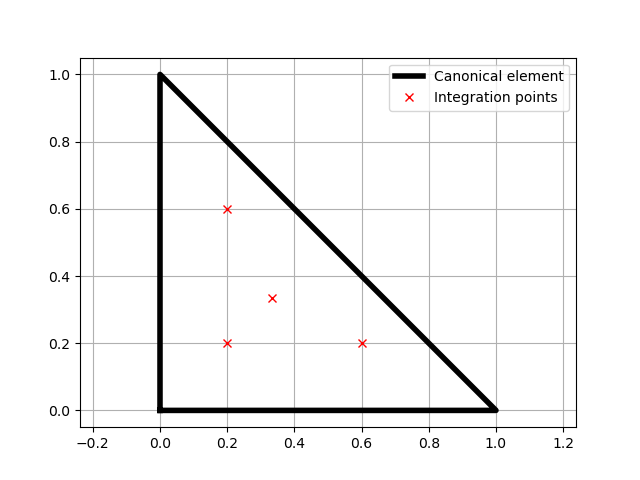

In [9]:
plt.figure()

plt.plot( [0,1,0,0], [0,0,1,0],'-k', linewidth=4, label='Canonical element' )
plt.plot(fem.tri3.xi.real, fem.tri3.eta.real,'xr', label='Integration points' )

plt.legend()
plt.axis('equal')
plt.grid()
plt.gca().set_axisbelow(True)

plt.show()

<IPython.core.display.Javascript object>


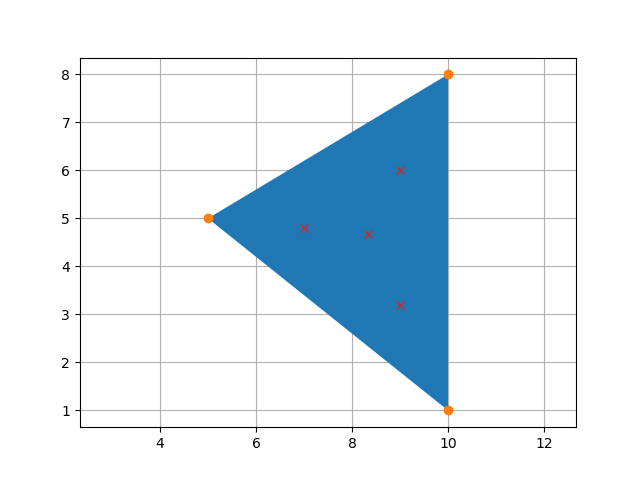

In [8]:
plt.figure()

plt.fill( fem.tri3.x.real, fem.tri3.y.real,'-C0' )
plt.plot( fem.tri3.x.real, fem.tri3.y.real,'oC1' )

xval = oti.dot(fem.tri3.N,fem.tri3.x)[0,0]
yval = oti.dot(fem.tri3.N,fem.tri3.y)[0,0]

plt.plot( xval.real, yval.real,'xC3' )
plt.axis('equal')
plt.grid(which='major')
plt.grid(which='minor')
plt.gca().set_axisbelow(True)
plt.show()

In [13]:
oti.gauss_integrate(xval**3,fem.tri3.w_dJ)

10718.7500 - 1137.5000 * e([1]) + 2275.0000 * e([2]) + 2581.2500 * e([3]) + 0.0000 * e([4]) - 1531.2500 * e([5]) + 1531.2500 * e([6]) - 140.0000 * e([[1,2]]) - 115.0000 * e([1,2]) + 195.0000 * e([[2,2]]) - 86.2500 * e([1,3]) + 350.0000 * e([2,3]) + 233.7500 * e([[3,2]]) + 0.0000 * e([1,4]) - 306.2500 * e([2,4]) + 306.2500 * e([3,4]) + 162.5000 * e([1,5]) - 193.7500 * e([2,5]) - 500.0000 * e([3,5]) - 162.5000 * e([1,6]) + 500.0000 * e([2,6]) + 193.7500 * e([3,6])

In [14]:
# %timeit oti.gauss_integrate(xval**3,fem.tri3.w_dJ)


# Quadrangle Element

In [15]:
# Integration order:
intorder = 3
# Number of dimensions of the analysis
ndim_an = 2

# OTI order:
oti_order = 3
x = oti.array([[ 1+oti.e(1,order=oti_order)],
               [ 8],
               [ 6],
               [ 3],
              ])

y = oti.array([[ 4+oti.e(2,order=oti_order)],
               [ 4],
               [ 6],
               [ 6],
              ])

z = oti.array([[ 0],
               [ 0],
               [ 0],
               [ 0],
              ])

els = np.array([ 0, 1, 2, 3])

fem.quad4.end()
fem.quad4.allocate(intorder, nbases=2,order=oti_order)
fem.quad4.allocate_spatial(ndim_an,compute_Jinv = True)
fem.quad4.set_coordinates(x,y,z,els)
fem.quad4.compute_jacobian()

In [16]:
val = oti.gauss_integrate(oti.one(nip=fem.quad4.nip),fem.quad4.w_dJ)
val

10.0000 - 1.0000 * e([1]) - 2.5000 * e([2]) + 0.0000 * e([1,2])

In [17]:
val.taylor_integrate(bases = [1,2], deltas=[1,1])

6.5000

<IPython.core.display.Javascript object>


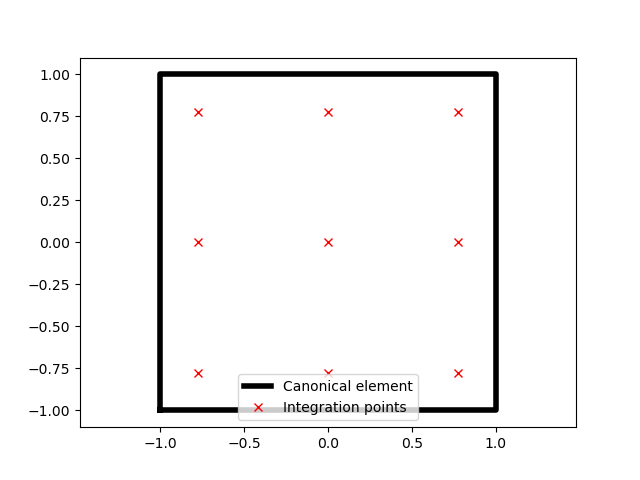

In [18]:
plt.figure()

plt.plot( [-1,1,1,-1,-1], [-1,-1,1,1,-1],'-k', linewidth=4, label='Canonical element' )
plt.plot(fem.quad4.xi.real, fem.quad4.eta.real,'xr', label='Integration points' )

plt.legend()
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


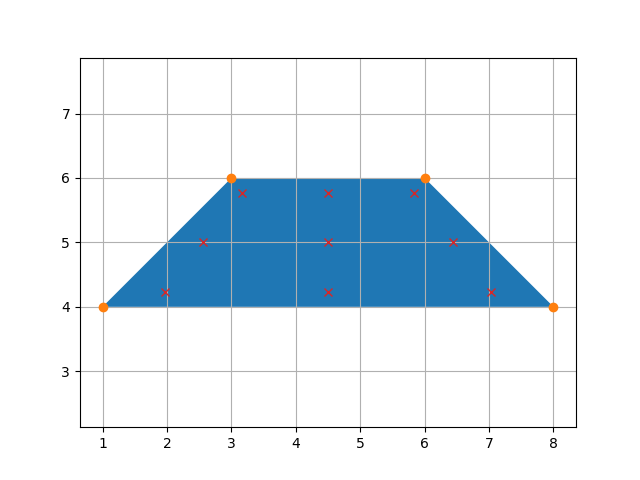

In [19]:
plt.figure()

plt.fill( fem.quad4.x.real, fem.quad4.y.real,'-C0' )
plt.plot( fem.quad4.x.real, fem.quad4.y.real,'oC1' )

xval = oti.dot(fem.quad4.N,fem.quad4.x)[0,0]
yval = oti.dot(fem.quad4.N,fem.quad4.y)[0,0]

plt.plot( xval.real, yval.real,'xC3' )
plt.axis('equal')
plt.grid(b=True,which='major')
plt.grid(which='minor')

plt.show()

In [22]:
%timeit fem.quad4.compute_jacobian()
fem.quad4.Nx

177 µs ± 1.78 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


matsofe< nip: 9, 
(Integration point - 0) 
-------------------------
matso< shape: (1, 4), 
 - Column 0
(0,0) -0.1 - 0.01 * e([1]) - 0.025 * e([2]) - 0.001 * e([[1,2]]) - 0.005 * e([1,2]) - 0.00625 * e([[2,2]]) - 0.0001 * e([[1,3]]) - 0.00075 * e([[1,2],2]) - 0.001875 * e([1,[2,2]]) - 0.0015625 * e([[2,3]])
 - Column 1
(0,1) 0.1 + 0.01 * e([1]) - 0.025 * e([2]) + 0.001 * e([[1,2]]) + 0 * e([1,2]) - 0.00625 * e([[2,2]]) + 0.0001 * e([[1,3]]) + 0.00025 * e([[1,2],2]) - 0.000625 * e([1,[2,2]]) - 0.0015625 * e([[2,3]])
 - Column 2
(0,2) 0.1 + 0.01 * e([1]) + 0.025 * e([2]) + 0.001 * e([[1,2]]) + 0.005 * e([1,2]) + 0.00625 * e([[2,2]]) + 0.0001 * e([[1,3]]) + 0.00075 * e([[1,2],2]) + 0.001875 * e([1,[2,2]]) + 0.0015625 * e([[2,3]])
 - Column 3
(0,3) -0.1 - 0.01 * e([1]) + 0.025 * e([2]) - 0.001 * e([[1,2]]) + 0 * e([1,2]) + 0.00625 * e([[2,2]]) - 0.0001 * e([[1,3]]) - 0.00025 * e([[1,2],2]) + 0.000625 * e([1,[2,2]]) + 0.0015625 * e([[2,3]])
>
-------------------------
(Integration point - 1

In [23]:
%timeit fem.quad4.compute_jacobian_bruteforce()
fem.quad4.Nx

258 µs ± 5.77 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


matsofe< nip: 9, 
(Integration point - 0) 
-------------------------
matso< shape: (1, 4), 
 - Column 0
(0,0) -0.1 - 0.01 * e([1]) - 0.025 * e([2]) - 0.001 * e([[1,2]]) - 0.005 * e([1,2]) - 0.00625 * e([[2,2]]) - 0.0001 * e([[1,3]]) - 0.00075 * e([[1,2],2]) - 0.001875 * e([1,[2,2]]) - 0.0015625 * e([[2,3]])
 - Column 1
(0,1) 0.1 + 0.01 * e([1]) - 0.025 * e([2]) + 0.001 * e([[1,2]]) + 0 * e([1,2]) - 0.00625 * e([[2,2]]) + 0.0001 * e([[1,3]]) + 0.00025 * e([[1,2],2]) - 0.000625 * e([1,[2,2]]) - 0.0015625 * e([[2,3]])
 - Column 2
(0,2) 0.1 + 0.01 * e([1]) + 0.025 * e([2]) + 0.001 * e([[1,2]]) + 0.005 * e([1,2]) + 0.00625 * e([[2,2]]) + 0.0001 * e([[1,3]]) + 0.00075 * e([[1,2],2]) + 0.001875 * e([1,[2,2]]) + 0.0015625 * e([[2,3]])
 - Column 3
(0,3) -0.1 - 0.01 * e([1]) + 0.025 * e([2]) - 0.001 * e([[1,2]]) + 0 * e([1,2]) + 0.00625 * e([[2,2]]) - 0.0001 * e([[1,3]]) - 0.00025 * e([[1,2],2]) + 0.000625 * e([1,[2,2]]) + 0.0015625 * e([[2,3]])
>
-------------------------
(Integration point - 1

# Tetrahedral Element

In [25]:
# Integration order:
intorder = 3
# Number of dimensions of the analysis
ndim_an = 3

# OTI order:
oti_order = 2
x = oti.array([[ 1+oti.e(1,order=oti_order)],
               [ 5],
               [ 1],
               [ 5],
              ])

y = oti.array([[ 1+oti.e(2,order=oti_order)],
               [ 1],
               [ 5],
               [ 5],
              ])

z = oti.array([[ 1+oti.e(3,order=oti_order)],
               [ 1],
               [ 1],
               [ 5],
              ])

els      = np.array([0,1,2,3])
els_face = np.array([0,1,2])
els_edge = np.array([0,1])

fem.tet4.end()
fem.tet4.allocate(intorder, nbases=3, order = oti_order)
fem.tet4.allocate_spatial(ndim_an,compute_Jinv = True)
fem.tet4.set_coordinates(x,y,z,els)
fem.tet4.compute_jacobian()

fem.tri3.end()
fem.tri3.allocate(intorder,nbases=1,order=oti_order)
fem.tri3.allocate_spatial(ndim_an,compute_Jinv = False)
fem.tri3.set_coordinates(x,y,z,els_face)
fem.tri3.compute_jacobian()

fem.line2.end()
fem.line2.allocate(intorder,nbases=1,order=oti_order)
fem.line2.allocate_spatial(ndim_an,compute_Jinv = False)
fem.line2.set_coordinates(x,y,z,els_edge)
fem.line2.compute_jacobian()

In [26]:
val = oti.gauss_integrate(1,fem.tet4.w_dJ)
val.real

10.666666666666666

In [27]:
val = oti.gauss_integrate(1,fem.tri3.w_dJ)
val

8.0000 - 2.0000 * e([1]) - 2.0000 * e([2]) + 0.0000 * e([[1,2]]) + 0.0000 * e([1,2]) + 0.0000 * e([[2,2]]) + 0.5000 * e([[3,2]])

In [28]:
AB = oti.array([fem.tri3.x[1]-fem.tri3.x[0], fem.tri3.y[1]-fem.tri3.y[0], fem.tri3.z[1]-fem.tri3.z[0]])
AC = oti.array([fem.tri3.x[2]-fem.tri3.x[0], fem.tri3.y[2]-fem.tri3.y[0], fem.tri3.z[2]-fem.tri3.z[0]])
cross = oti.array([
    AB[1,0]*AC[2,0]-AB[2,0]*AC[1,0] ,
  -(AB[0,0]*AC[2,0]-AB[2,0]*AC[0,0]),
    AB[0,0]*AC[1,0]-AB[1,0]*AC[0,0] ,
])
oti.norm(cross)*.5

8.0000 - 2.0000 * e([1]) - 2.0000 * e([2]) + 0.0000 * e([[1,2]]) + 0.0000 * e([1,2]) + 0.0000 * e([[2,2]]) + 0.5000 * e([[3,2]])

In [29]:
val.taylor_integrate(bases=[1,2,3],deltas=[-10,-20,-10]).real

117.9999999999999

In [30]:
%timeit fem.tet4.compute_jacobian()
%timeit fem.tet4.compute_jacobian_bruteforce()

188 µs ± 2.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
341 µs ± 2.89 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<IPython.core.display.Javascript object>


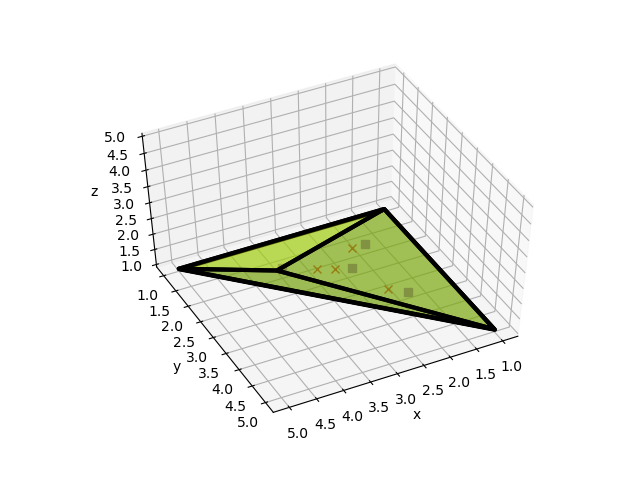

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
tris = np.array([[0,1,2],
                 [1,2,3],
                 [0,1,3],
                 [0,2,3],
                ])
# ax.plot(x.real.reshape(-1),y.real.reshape(-1),z.real.reshape(-1),'k',linewidth = 4)
ax.plot_trisurf(x.real.reshape(-1),y.real.reshape(-1),z.real.reshape(-1),
                triangles=tris, linewidth = 3,color=[1,1,0,0.2],edgecolor='k')

xval = oti.dot(fem.tet4.N,fem.tet4.x)[0,0]
yval = oti.dot(fem.tet4.N,fem.tet4.y)[0,0]
zval = oti.dot(fem.tet4.N,fem.tet4.z)[0,0]

ax.plot( xval.real, yval.real,zval.real,'xC3' )


ax.plot_trisurf(fem.tri3.x.real.reshape(-1),fem.tri3.y.real.reshape(-1),fem.tri3.z.real.reshape(-1),
                triangles=[0,1,2], linewidth = 3,color=[0.5,1,0.1,0.5],edgecolor='k')


xval = oti.dot(fem.tri3.N,fem.tri3.x)[0,0]
yval = oti.dot(fem.tri3.N,fem.tri3.y)[0,0]
zval = oti.dot(fem.tri3.N,fem.tri3.z)[0,0]

ax.plot( xval.real, yval.real,zval.real,'sC4' )



ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [28]:
val = oti.gauss_integrate(oti.one(nip=fem.tet4.nip),fem.tet4.w_dJ)
val.real

10.666666666666666

In [34]:
a = oti.array([x[0,0],y[0,0],z[0,0]])
b = oti.array([x[1,0],y[1,0],z[1,0]])
c = oti.array([x[2,0],y[2,0],z[2,0]])
d = oti.array([x[3,0],y[3,0],z[3,0]])
V = np.linalg.det(np.c_[a.real-d.real,b.real-d.real,c.real-d.real])/6
abs(V)

10.666666666666663

# Hexahedral element.

In [3]:
oti_order=1
x = oti.array([[ 0],
               [ 0],
               [ 0],
               [ 0],
               [ 6],
               [ 6],
               [ 6],
               [ 6+oti.e(1,order=oti_order)],
              ])

y = oti.array([[ 3],
               [ 5],
               [ 5],
               [ 3],
               [ 3],
               [ 5],
               [ 5],
               [ 3],
              ])

res = oti.dot_product(x,y)
oti.dot_product

96.0000 + 3.0000 * e([1])

In [14]:
# Integration order:
intorder = 3
# Number of dimensions of the analysis
ndim_an = 3

# OTI order:
oti_order = 1
x = oti.array([[ 0+oti.e(1,order=oti_order)],
               [ 0],
               [ 0],
               [ 0],
               [ 6],
               [ 6],
               [ 6],
               [ 6],
              ])

y = oti.array([[ 3],
               [ 5],
               [ 5],
               [ 3],
               [ 3],
               [ 5],
               [ 5],
               [ 3],
              ])

z = oti.array([[ 1],
               [ 1],
               [ 4],
               [ 4],
               [ 1],
               [ 1],
               [ 4],
               [ 4],
              ])

els      = np.array([0,1,2,3,4,5,6,7])
# els_face = np.array([5,1,2,6])
# els_edge = np.array([5,1])

els_face = np.array([5,1,0,4])
els_edge = np.array([4,5])

fem.hex8.end()
fem.hex8.allocate(intorder,nbases=1,order=oti_order)
fem.hex8.allocate_spatial(ndim_an,compute_Jinv = True)
fem.hex8.set_coordinates(x,y,z,els)
fem.hex8.compute_jacobian()

fem.quad4.end()
fem.quad4.allocate(intorder,nbases=1,order=oti_order)
fem.quad4.allocate_spatial(ndim_an,compute_Jinv = True)
fem.quad4.set_coordinates(x,y,z,els_face)
fem.quad4.compute_jacobian()

fem.line2.end()
fem.line2.allocate(intorder,nbases=1,order=oti_order)
fem.line2.allocate_spatial(ndim_an,compute_Jinv = True)
fem.line2.set_coordinates(x,y,z,els_edge)
fem.line2.compute_jacobian()

In [12]:
fem.hex8.J.nip

27

In [13]:
out = fem.hex8.J.copy()
%timeit fem.hex8.J+fem.hex8.J
%timeit fem.sum(fem.hex8.J,fem.hex8.J)
%timeit fem.sum(fem.hex8.J,fem.hex8.J, out=out)

62.3 µs ± 1.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
68.6 µs ± 9.65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
10.4 µs ± 185 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [15]:
%timeit fem.hex8.compute_jacobian()
%timeit fem.hex8.compute_jacobian_bruteforce()

789 µs ± 20.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.08 ms ± 69.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
out[:,0] = oti.array([[0.5],[0.8],[0.9]], nip=27)+oti.e(1)
G=oti.gauss_integrate(out,fem.hex8.w_dJ)


NameError: name 'out' is not defined

In [4]:
fem.line2.J.shape, fem.quad4.J.shape

((1, 3), (2, 3))

In [14]:
J = fem.line2.J
# Right inverse
Jinv_right = oti.dot( oti.transpose(J), oti.inv( oti.dot( J, oti.transpose(J) ) ) )
# 

In [15]:
oti.gauss_integrate(Jinv_right,fem.line2.w_dJ)

matso< shape: (3, 1), 
 - Column 0
(0,0) 0
(1,0) 2
(2,0) 0
>

In [5]:
Jinv_left = oti.dot( oti.inv( oti.dot( oti.transpose(J), J ) ), oti.transpose(J)  )

In [13]:
oti.dot( oti.transpose(J), J ) 
oti.dot( J, oti.transpose(J) ) 

matsofe< nip: 3, 
(Integration point - 0) 
-------------------------
matso< shape: (1, 1), 
 - Column 0
(0,0) 1
>
-------------------------
(Integration point - 1) 
-------------------------
matso< shape: (1, 1), 
 - Column 0
(0,0) 1
>
-------------------------
(Integration point - 2) 
-------------------------
matso< shape: (1, 1), 
 - Column 0
(0,0) 1
>
-------------------------
>

In [10]:
oti.gauss_integrate(Jinv_left,fem.line2.w_dJ)

matso< shape: (3, 1), 
 - Column 0
(0,0) nan
(1,0) nan
(2,0) nan
>

In [6]:
oti.inv( oti.dot( J, oti.transpose(J) ) )

matsofe< nip: 3, 
(Integration point - 0) 
-------------------------
matso< shape: (1, 1), 
 - Column 0
(0,0) 1
>
-------------------------
(Integration point - 1) 
-------------------------
matso< shape: (1, 1), 
 - Column 0
(0,0) 1
>
-------------------------
(Integration point - 2) 
-------------------------
matso< shape: (1, 1), 
 - Column 0
(0,0) 1
>
-------------------------
>

In [3]:
fem.line2.compute_jacobian_bruteforce()
fem.quad4.compute_jacobian_bruteforce()

In [7]:
fem.quad4.Nx

matsofe< nip: 9, 
(Integration point - 0) 
-------------------------
matso< shape: (1, 4), 
 - Column 0
(0,0) 0.0833333 + 0.00694444 * e([1])
 - Column 1
(0,1) -0.0833333 - 0.00694444 * e([1])
 - Column 2
(0,2) -0.0833333 - 0.00694444 * e([1])
 - Column 3
(0,3) 0.0833333 + 0.00694444 * e([1])
>
-------------------------
(Integration point - 1) 
-------------------------
matso< shape: (1, 4), 
 - Column 0
(0,0) 0.147883 + 0.00277778 * e([1])
 - Column 1
(0,1) -0.147883 - 0.00277778 * e([1])
 - Column 2
(0,2) -0.0187836 - 0.000352824 * e([1])
 - Column 3
(0,3) 0.0187836 + 0.000352824 * e([1])
>
-------------------------
(Integration point - 2) 
-------------------------
matso< shape: (1, 4), 
 - Column 0
(0,0) 0.0187836 + 0.00277778 * e([1])
 - Column 1
(0,1) -0.0187836 - 0.00277778 * e([1])
 - Column 2
(0,2) -0.147883 - 0.0218694 * e([1])
 - Column 3
(0,3) 0.147883 + 0.0218694 * e([1])
>
-------------------------
(Integration point - 3) 
-------------------------
matso< shape: (1, 4), 


In [17]:
oti.gauss_integrate(oti.dot(fem.hex8.N,oti.ones((fem.hex8.nbasis,1))),fem.hex8.w_dJ)

matso< shape: (1, 1), 
 - Column 0
(0,0) 0 - 2.26993e-17 * e([1])
>

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
vals = np.array([0,1,2,3,7,6,5,4,0,3,7,4,5,1,2,6])


# Plot Hex
xval = oti.dot_product(fem.hex8.N,fem.hex8.x)
yval = oti.dot_product(fem.hex8.N,fem.hex8.y)
zval = oti.dot_product(fem.hex8.N,fem.hex8.z)

ax.plot( xval.real, yval.real,zval.real,'xC3' )

# Plot Quad:
xval = oti.dot_product(fem.quad4.N,fem.quad4.x)
yval = oti.dot_product(fem.quad4.N,fem.quad4.y)
zval = oti.dot_product(fem.quad4.N,fem.quad4.z)

ax.plot( xval.real, yval.real,zval.real,'xC4' )





xr = x.real.reshape(-1)
yr = y.real.reshape(-1)
zr = z.real.reshape(-1)
ax.plot(xr[vals],yr[vals],zr[vals],'k',linewidth = 4)
ax.plot(xr,yr,zr,'ob',linewidth = 4)
# ax.plot_trisurf(x.real.reshape(-1),y.real.reshape(-1),z.real.reshape(-1),
#                 triangles=tris, linewidth = 3,color=[1,1,0,0.2],edgecolor='k')





# Plot Line:
xval = oti.dot_product(fem.line2.N,fem.line2.x)
yval = oti.dot_product(fem.line2.N,fem.line2.y)
zval = oti.dot_product(fem.line2.N,fem.line2.z)

ax.plot( xval.real, yval.real,zval.real,'xC9' )










xmax, xmin = max(xr), min(xr)
ymax, ymin = max(yr), min(yr)
zmax, zmin = max(zr), min(zr)

xc = (xmax + xmin)/2
yc = (ymax + ymin)/2
zc = (zmax + zmin)/2

delta = max(max(xmax-xmin,ymax-ymin),zmax-zmin)

ax.axes.set_xlim3d([-delta/2+xc,delta/2+xc])
ax.axes.set_ylim3d([-delta/2+yc,delta/2+yc])
ax.axes.set_zlim3d([-delta/2+zc,delta/2+zc])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [48]:
val = oti.gauss_integrate(1,fem.hex8.w_dJ)
val.real

36.00000000000006

In [31]:
val = oti.gauss_integrate(1,fem.quad4.w_dJ)
val.real

12.000000000000012

In [24]:
val = oti.gauss_integrate(1,fem.line2.w_dJ)
val.real

6.000000000000003

# Line Element

In [8]:
# Integration order:
intorder = 2
# Number of dimensions of the analysis
ndim_an = 1

# OTI order:
oti_order = 3
x = oti.array([[ 0.00],
               [ 0.25],
              ])

y = oti.array([[ 0],
               [ 0],
              ])

z = oti.array([[ 0],
               [ 0],
              ])

els = np.array([0,1])

fem.line2.end()
fem.line2.allocate(intorder)
fem.line2.allocate_spatial(ndim_an,compute_Jinv = True)
fem.line2.set_coordinates(x,y,z,els)
fem.line2.compute_jacobian()

In [9]:
a = 1
evalf = - oti.dot(oti.transpose(fem.line2.Nx),fem.line2.Nx) +a * oti.dot(oti.transpose(fem.line2.N),fem.line2.N)


oti.gauss_integrate(evalf,fem.line2.w_dJ).real


array([[-3.91666667,  4.04166667],
       [ 4.04166667, -3.91666667]])

In [13]:
# Integration order:
intorder = 2
# Number of dimensions of the analysis
ndim_an = 2

# OTI order:
oti_order = 3
x = oti.array([[ 0.00],
               [ 0.00],
              ])

y = oti.array([[ 0.00],
               [ 0.25],
              ])

z = oti.array([[ 0],
               [ 0],
              ])

els = np.array([0,1])

fem.line2.end()
fem.line2.allocate(intorder)
fem.line2.allocate_spatial(ndim_an,compute_Jinv = True)
fem.line2.set_coordinates(x,y,z,els)
fem.line2.compute_jacobian_bruteforce()

In [15]:
24.25/6

4.041666666666667

In [4]:
%timeit oti.dot(oti.transpose(fem.line2.Nx),fem.line2.Nx)

1.92 µs ± 89 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [14]:
NxT = oti.transpose(fem.line2.Ny)
NxT.shape
res = oti.dot(oti.transpose(fem.line2.Ny),fem.line2.Ny)
res

# oti.add(lhs, rhs, out = )

matsofe< nip: 2, 
(Integration point - 0) 
-------------------------
matso< shape: (2, 2), 
 - Column 0
(0,0) 16
(1,0) -16
 - Column 1
(0,1) -16
(1,1) 16
>
-------------------------
(Integration point - 1) 
-------------------------
matso< shape: (2, 2), 
 - Column 0
(0,0) 16
(1,0) -16
 - Column 1
(0,1) -16
(1,1) 16
>
-------------------------
>

In [15]:
fem.line2.Nx.shape

(1, 2)

In [16]:
fem.line2.Nxi

matsofe< nip: 2, 
(Integration point - 0) 
-------------------------
matso< shape: (1, 2), 
 - Column 0
(0,0) -0.5
 - Column 1
(0,1) 0.5
>
-------------------------
(Integration point - 1) 
-------------------------
matso< shape: (1, 2), 
 - Column 0
(0,0) -0.5
 - Column 1
(0,1) 0.5
>
-------------------------
>

In [135]:
fem.line2.w


sotife< nip: 2, 
(0) 1
(1) 1
>